In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from networkx.algorithms import bipartite
from numpy import linalg as LA
from numpy.linalg import matrix_rank
import numpy as np
import json

In [15]:
def divisor_graph(n):
    divisors = [item for item in range(1,n+1) if n % item ==0]
    g=nx.empty_graph(divisors)
    for i in divisors:
        for j in divisors:
            if i !=j and (i %j ==0 or j % i ==0):
                g.add_edge(i,j)
    return g  

def number_of_divisors(n):
    divisors = [item for item in range(1,n+1) if n % item ==0]
    return len(divisors)
    

def reduced_divisor_graph(n):
    divisors = [item for item in range(2,n) if n % item ==0]
    g=nx.empty_graph(divisors)
    for i in divisors:
        for j in divisors:
            if i !=j and (i %j ==0 or j % i ==0):
                g.add_edge(i,j)
    return g  


def induced_graph(g,v):
    n = len(v)
    induced_g=nx.empty_graph(n)
    for i in range(n):
        for j in range(n):
            if v[j] in g.neighbors(v[i]):
                induced_g.add_edge(i,j)
    return induced_g 

def factorization_type(n):
    result = []
    for item in factor(n):
        result.append(item[1])
    result.sort()    
    return tuple(result)

def rel_factorization_type(n,d):
    factors = factor(d)
    prime_factor = {item[0]:item[1] for item in factors}
    result = []
    factor_n = sorted(factor(n), key = lambda x: x[1])
    for item in factor_n:
        if item[0] in prime_factor:
            result.append(prime_factor[item[0]])
        else:
            result.append(0) 
    return tuple(result)

def char_poly(g):
    adj_matrix = nx.adjacency_matrix(g).todense()
    matrix_size = g.number_of_nodes()
    matrix = adj_matrix
    f = MatrixSpace(IntegerRing(),matrix_size)(matrix).charpoly()
    return f.factor() 

def raw_char_poly(g):
    adj_matrix = nx.adjacency_matrix(g).todense()
    matrix_size = g.number_of_nodes()
    matrix = adj_matrix
    f = MatrixSpace(IntegerRing(),matrix_size)(matrix).charpoly()
    return f

# Test the code with small values of $n$ 

array([[0, 1, 1, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 1, 1, 0]])

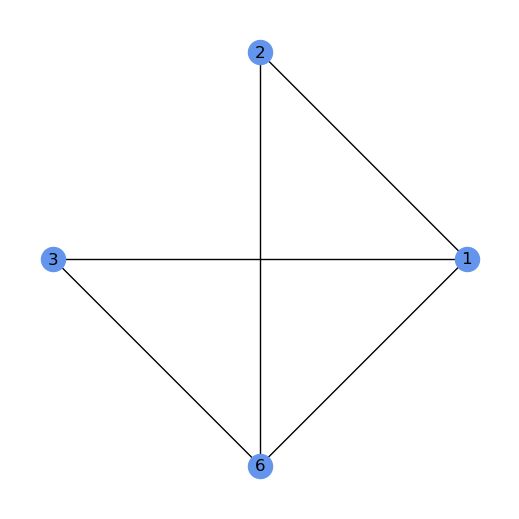

In [16]:
n=6
g = divisor_graph(n)
fig = plt.gcf()
fig.set_size_inches(5,5)
pos = nx.circular_layout(g)
nx.draw(g, pos=pos,
       with_labels = True,
       #node_size = 600,
       #scale = 1,
       node_color = '#6495ED')
plt.savefig("divisor_graph_6.png", dpi =300)
matrix = nx.adjacency_matrix(g)
matrix.todense()

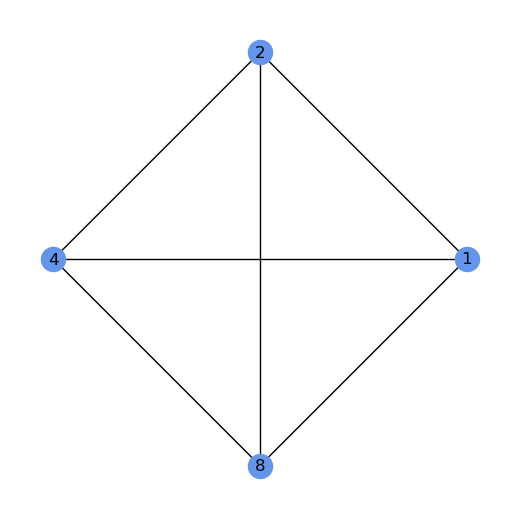

In [17]:
n=8
g = divisor_graph(n)
fig = plt.gcf()
fig.set_size_inches(5,5)
pos = nx.circular_layout(g)
nx.draw(g, pos=pos,
       with_labels = True,
       #node_size = 600,
       #scale = 1,
       node_color = '#6495ED')

# Test for the characteristic polynomials of $D_n$

In [11]:
n = 2*3 
g = divisor_graph(n)
f = char_poly(g)
f

x * (x + 1) * (x^2 - x - 4)

In [12]:
n = 2*3*5*7
g = divisor_graph(n)
f = char_poly(g)
f

x^2 * (x + 3)^2 * (x + 1)^4 * (x^2 - 7*x - 16) * (x^2 - x - 4)^3

In [13]:
n = 2**2*3
g = divisor_graph(n)
f = char_poly(g)
f

(x + 1) * (x^2 + x - 1) * (x^3 - 2*x^2 - 8*x - 3)

In [14]:
n = 2**2*3*5*7
g = divisor_graph(n)
f = char_poly(g)
f

(x + 2)^2 * (x + 1)^3 * (x^2 + x - 1)^2 * (x^3 - 2*x^2 - 8*x - 3)^2 * (x^4 + 3*x^3 - 14*x^2 - 47*x - 33) * (x^5 - 8*x^4 - 59*x^3 - 7*x^2 + 184*x + 105)

In [22]:
n1 = 2**2 *3
g1 = divisor_graph(n1)
f1 = raw_char_poly(g1)
n2= n1 * 5*7
g2 = divisor_graph(n2)
f2 = raw_char_poly(g2)
print(f2 % f1**2  == 0)


True


# Finding $n$ such that $f_{n}^2 | f_{npq}$

In [29]:
d = set()
result = set()
for n in range(3,10000):
    if gcd(n,6)==1:
        fact_type = factorization_type(n)
        if fact_type not in d:
            d.add(fact_type)
            g1 = divisor_graph(n)
            f1 = raw_char_poly(g1)
            g2 = divisor_graph(2*3*n)
            f2 = raw_char_poly(g2)
            if (f2 % f1**2 !=0):
                result.add(fact_type)
result
            
        
        

{(2,), (2, 2), (2, 3), (3,), (4,), (5,)}

In [30]:
for n in range(10000, 40000):
    if gcd(n,6)==1:
        fact_type = factorization_type(n)
        if fact_type not in d:
            d.add(fact_type)
            g1 = divisor_graph(n)
            f1 = raw_char_poly(g1)
            g2 = divisor_graph(2*3*n)
            f2 = raw_char_poly(g2)
            if (f2 % f1**2 !=0):
                result.add(fact_type)
result

{(2,), (2, 2), (2, 3), (2, 4), (3,), (4,), (5,), (6,)}

In [31]:
for n in range(40000, 80000):
    if gcd(n,6)==1:
        fact_type = factorization_type(n)
        if fact_type not in d:
            d.add(fact_type)
            g1 = divisor_graph(n)
            f1 = raw_char_poly(g1)
            g2 = divisor_graph(2*3*n)
            f2 = raw_char_poly(g2)
            if (f2 % f1**2 !=0):
                result.add(fact_type)
result

{(2,), (2, 2), (2, 3), (2, 4), (3,), (3, 3), (4,), (5,), (6,), (7,)}

In [85]:
n1 = 2*3
g1 = divisor_graph(n1)
f1 = raw_char_poly(g1)
n2= (n1)**2 * 5**2 * 7 * 11
g2 = divisor_graph(n2)
f2 = raw_char_poly(g2)
print(f2 % f1  == 0)


True


In [76]:
n1 = 2*3
seen_fact_type = set()
multiple = set()
g1 = divisor_graph(n1)
f1 = raw_char_poly(g1)
for n in range(3,80000):
    if n % 6==0:
        fact_type = factorization_type(n)
        if fact_type not in seen_fact_type:
            seen_fact_type.add(fact_type)
            g = divisor_graph(n)
            f = raw_char_poly(g)
            if f % f1 == 0:
                power = tuple(item[1] for item in factor(n))
                multiple.add(power)
multiple

{(1, 1), (1, 1, 1, 1), (1, 1, 1, 1, 1, 1), (2, 2, 2, 1, 1)}

In [80]:
for n in range(400000, 800000):
    if n % 6==0:
        fact_type = factorization_type(n)
        if fact_type not in seen_fact_type:
            seen_fact_type.add(fact_type)
            g = divisor_graph(n)
            f = raw_char_poly(g)
            if f % f1 == 0:
                power = tuple(item[1] for item in factor(n))
                multiple.add(power)
multiple

{(1, 1), (1, 1, 1, 1), (1, 1, 1, 1, 1, 1), (2, 2, 2, 1, 1)}

In [98]:
for n in range(150000,200000):
    if n % 6==0:
        fact_type = factorization_type(n)
        if fact_type not in seen_fact_type:
            seen_fact_type.add(fact_type)
            g = divisor_graph(n)
            f = raw_char_poly(g)
            if f % f1 == 0:
                power = tuple(item[1] for item in factor(n))
                multiple.add(power)
multiple

{(1, 1), (1, 1, 1, 1), (1, 1, 1, 1, 1, 1), (2, 2, 2, 1, 1)}